In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Metrics implementation
## Implement 5 metrics you've acknowledged during lecture:
- confusion matrix
- accuracy
- precision
- recall
- f1_score

Both for the binary and multiclass classification task
## **IMPORTANT**: when faced with a multiclass task implement your metric according to the 'macro' average policy ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html))

In [14]:
from testing_module import test_metric
def my_confusion_matrix(y_true, y_pred) -> np.ndarray:
    classes = max(y_true) + 1
    matrix = np.zeros((classes, classes), dtype=np.uint32)
    for yy_true, yy_pred in zip(y_true, y_pred):
        matrix[int(yy_true),int(yy_pred)] += 1
    return matrix

def my_accuracy_function(y_true, y_pred):
    hit = 0
    for yy_true, yy_pred in zip(y_true, y_pred):
        if yy_true == yy_pred:
            hit += 1
    return hit / len(y_true)

def partial_recall(matrix, i):
    tp = matrix[i,i]
    fntp = sum(matrix[i])
    return tp/fntp if fntp != 0 else 0

def my_recall_function(y_true, y_pred):
    matrix = my_confusion_matrix(y_true, y_pred)

    if matrix.shape[0] == 2:
        tp = matrix[1,1]
        fn = matrix[1,0]
        return tp/(tp+fn)

    return np.average([partial_recall(matrix, i)for i in range(len(matrix))])

def partial_precision(matrix, i):
    tp = matrix[i,i]
    fptp = sum(matrix[:, i])
    return tp/fptp if fptp != 0 else 0

def my_precision_function(y_true, y_pred):
    matrix = my_confusion_matrix(y_true, y_pred)

    if len(matrix) == 2:
        tp = matrix[1,1]
        fp = matrix[0,1]
        return tp/(tp+fp)
        
    return np.average([partial_precision(matrix, i)for i in range(len(matrix))])

def my_f1_function(y_true, y_pred):
    matrix = my_confusion_matrix(y_true, y_pred)
    if len(matrix) == 2:
        precision = my_precision_function(y_true, y_pred)
        recall = my_recall_function(y_true, y_pred)
        return 2*precision*recall/(precision+recall)
    else:
        result_sum = 0
        for i in range(len(matrix)):
            precision = partial_precision(matrix, i)
            recall = partial_recall(matrix, i)
            result_sum += 2*precision*recall/(precision+recall)
        return result_sum / len(matrix)
    

# Implementation tests

In [16]:
test_metric(confusion_matrix, my_confusion_matrix)
test_metric(accuracy_score, my_accuracy_function)
test_metric(recall_score, my_recall_function)
test_metric(precision_score, my_precision_function)
test_metric(f1_score, my_f1_function)

(None, None)

# Classification task
Using knowledge from the lecture and lecture notebook import data from `/data/seeds_dataset.csv`, train, test and compare models you've already encountered (and extra ones from sklearn if you want :)). Try e.g. to choose the best value of the `max_depth` hyperparameter in the `sklearn.tree.DecisionTreeClassifier()` model
## Have fun!

In [6]:
import pandas as pd
import os

data = pd.read_csv("data/seeds_dataset.csv")
X = data.drop('class', axis=1).values
y = data['class'].values

for i, col in enumerate(X.T):
    X[:, i] /= max(col)

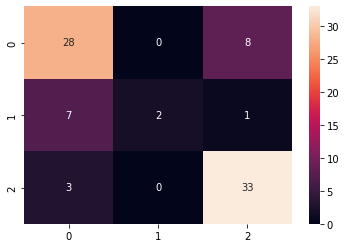

Accuracy:	0.7682926829268293
Precision:	0.8408521303258145
Recall:		0.6314814814814814
F1:		0.6454146454146454


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from seaborn import heatmap
from matplotlib import pyplot as plt

MODELS = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=3)
    DecisionTreeClassifier(max_depth=5)
    DecisionTreeClassifier(max_depth=7)
    DecisionTreeClassifier(max_depth=10)
    ]

def show_metrics(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    avg = "binary" if matrix.shape[0] == 2 else "macro"

    fig = plt.figure()
    fig.add
    ax = plt.axes()
    heatmap(matrix, annot=True, ax=ax)
    plt.show()

    print(f"Accuracy:\t{accuracy_score(y_test, y_pred)}")
    print(f"Precision:\t{precision_score(y_test, y_pred, average=avg)}")
    print(f"Recall:\t\t{recall_score(y_test, y_pred, average=avg)}")
    print(f"F1:\t\t{f1_score(y_test, y_pred, average=avg)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

for model in MODELS:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    show_metrics(y_test, y_pred)
    
